In [1]:
# Frist import the required libraries
import scanpy as sc
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

sc.logging.print_header()

scanpy==1.9.2 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.9.3 pandas==1.5.2 scikit-learn==1.2.0 statsmodels==0.13.5 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.8


In [2]:
# make data directories
!mkdir data
!mkdir data/vizgen_merfish
!mkdir data/vizgen_merfish/images

mkdir: data: File exists
mkdir: data/vizgen_merfish: File exists
mkdir: data/vizgen_merfish/images: File exists


In [3]:
# create path to data directory

vizgen_dir = Path().resolve() / "data" / "vizgen_merfish"

adata = sq.read.vizgen(
    path=vizgen_dir,
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    transformation_file="micron_to_mosaic_pixel_transform.csv",
)

In [4]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"],percent_top=(10, 20, 50, 100, 200, 400), inplace=True)

# QC

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='n_genes_by_counts'>

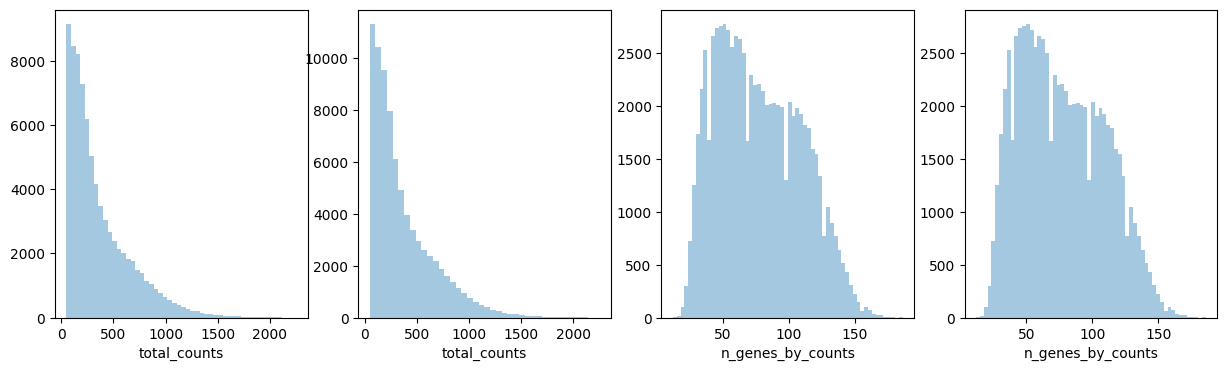

In [5]:
#subplot shows adata.obs["total_counts"] less than 10000sns.distplot(
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)
sns.distplot(
    adata.obs["total_counts"][adata.obs["total_counts"] < 10000],
    kde=False,
    bins=40,
    ax=axs[1],
)
sns.distplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    bins=60,
    ax=axs[2],
)
sns.distplot(
    adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
    kde=False,
    bins=60,
    ax=axs[3],
)

In [6]:
# Filter cells based on the minimum number of counts required using scanpy.pp.filter_cells. 
# Filter genes based on the minimum number of cells required with scanpy.pp.filter_genes. 
sc.pp.filter_cells(adata, min_counts=20)
sc.pp.filter_genes(adata, min_cells=20)

In [7]:
!pip install scikit-misc


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


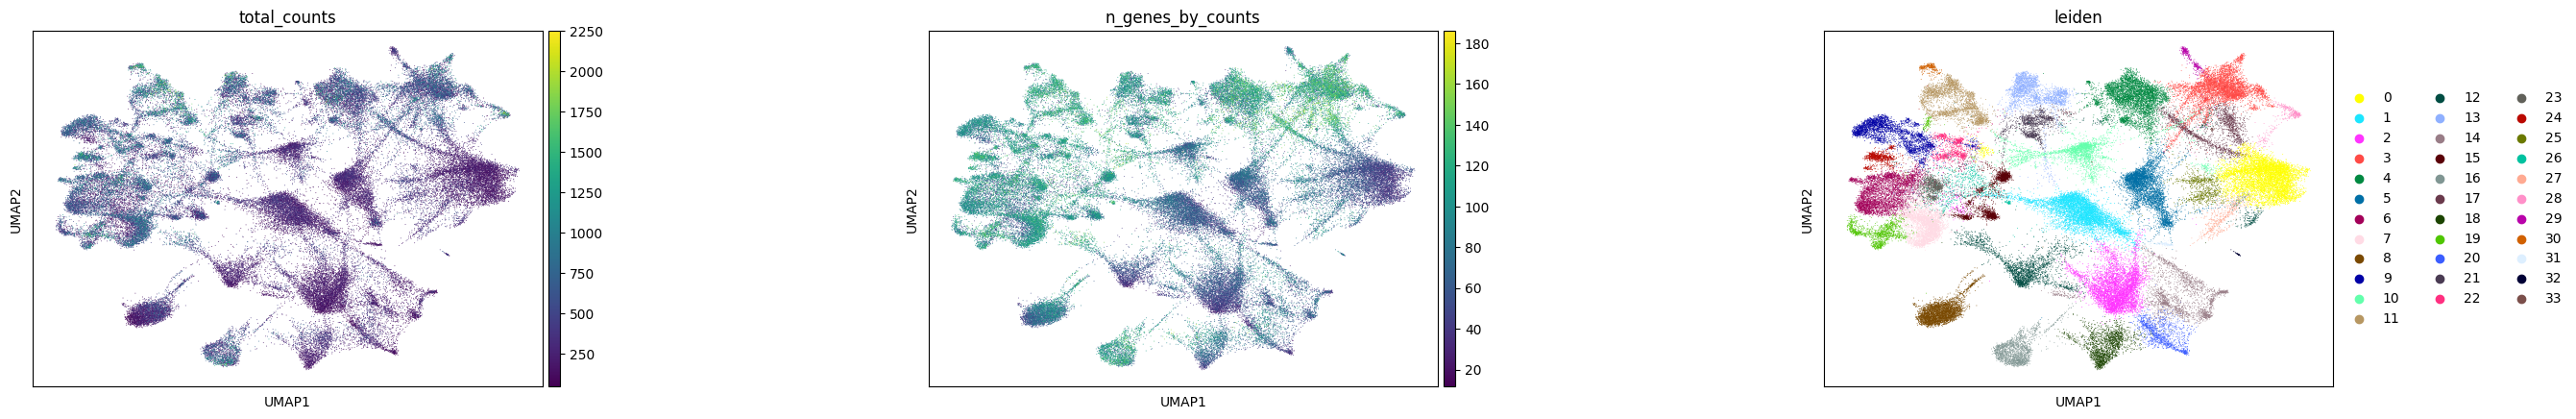

In [9]:
# visualization
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.6,
)

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


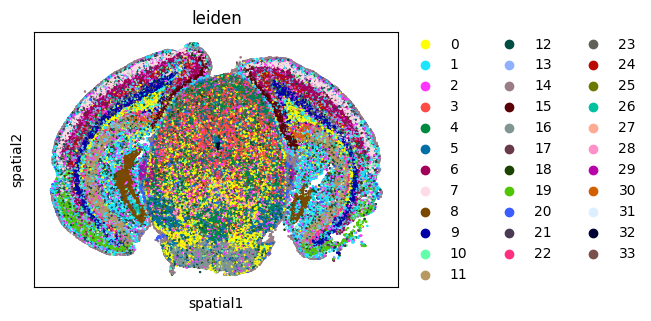

In [10]:
sq.pl.spatial_scatter(adata, shape=None,color=[
        "leiden",
    ],
    wspace=0.6,)

In [11]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)

In [12]:
sq.gr.centrality_scores(adata, cluster_key="leiden")

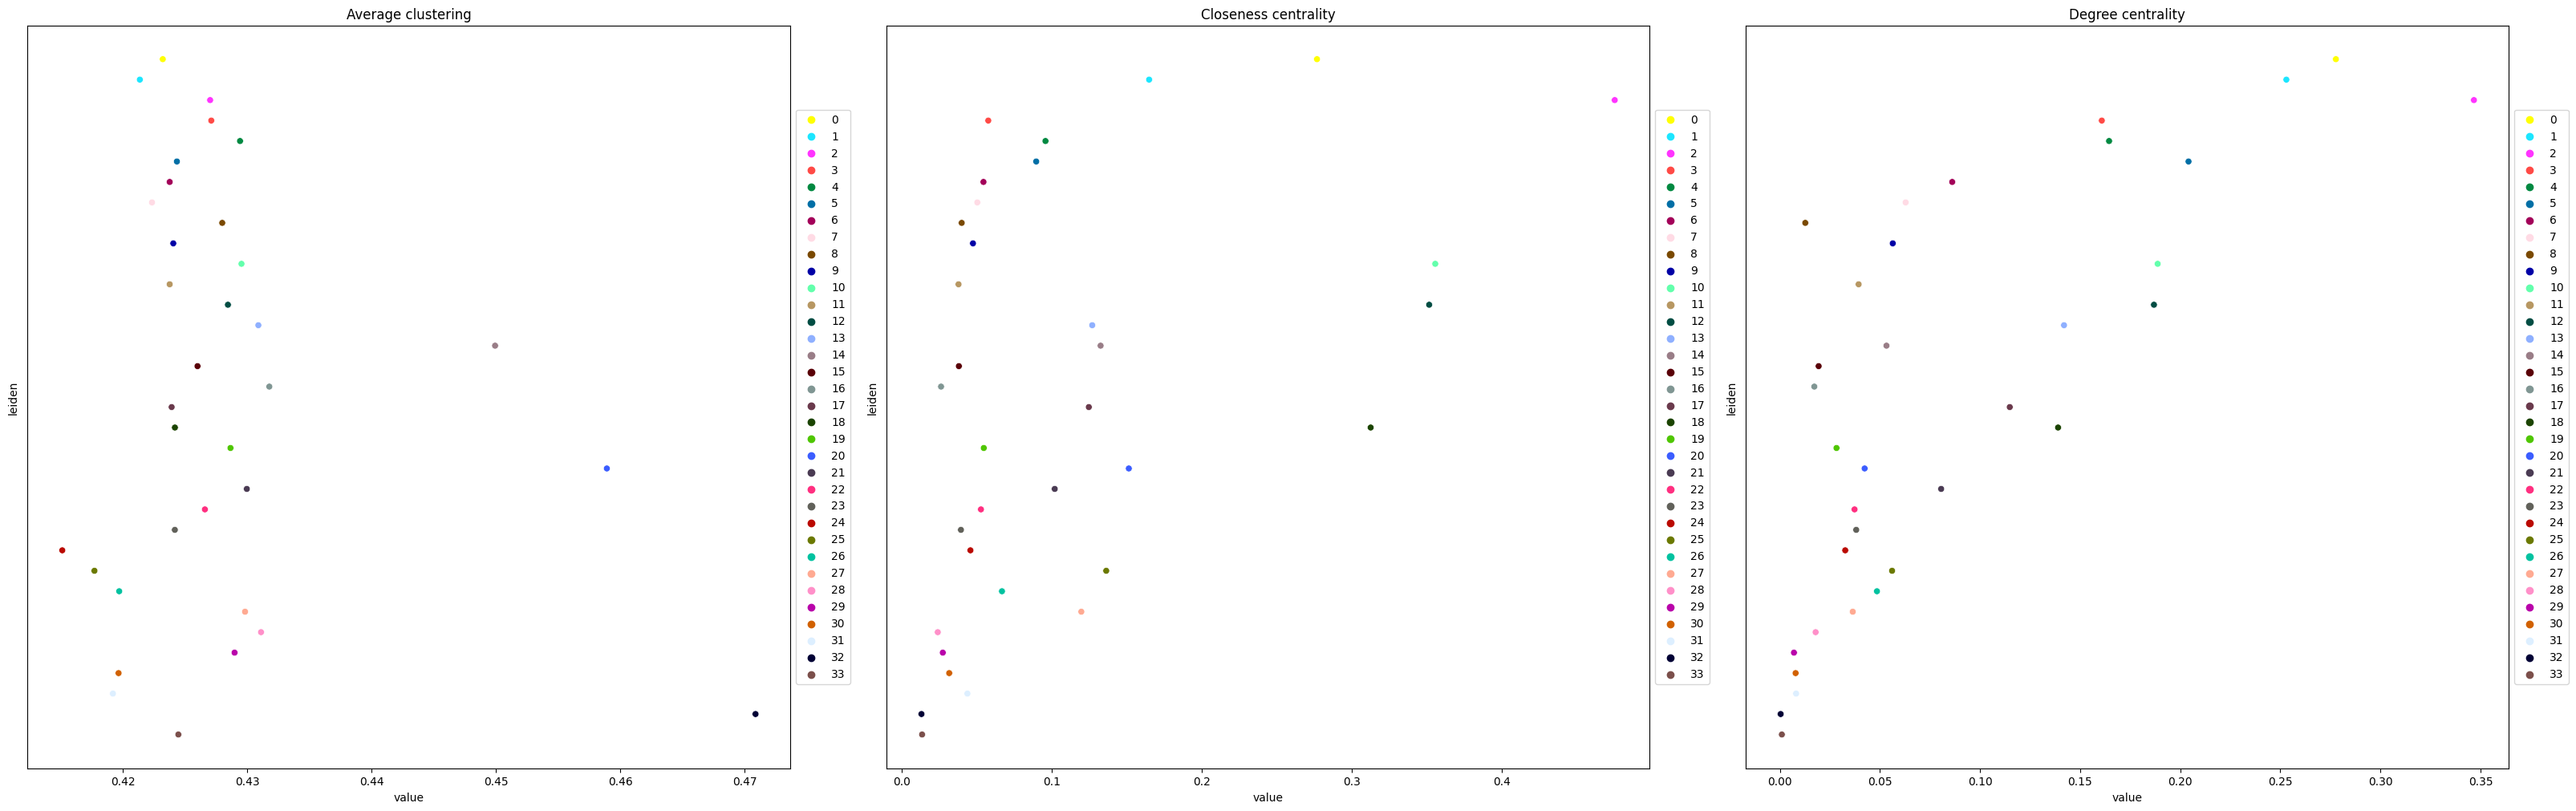

In [13]:
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(8, 10))

In [14]:
adata_subsample = sc.pp.subsample(adata, fraction=0.8, copy=True)

100%|███████████████████████████████████████████| 496/496 [03:34<00:00,  2.31/s]


/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  cis = grouped.apply(bootstrapped_cis)
/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/seaborn/relational.py:414: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .grou

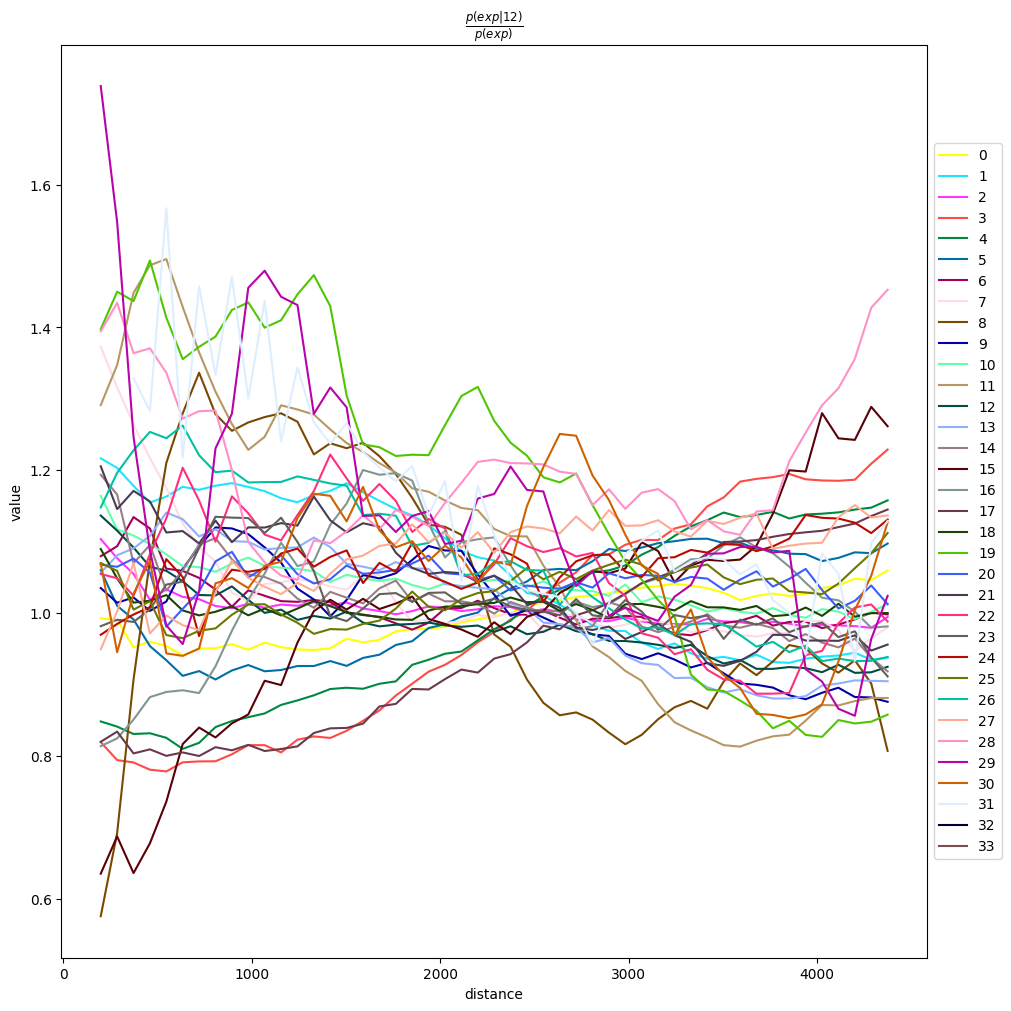

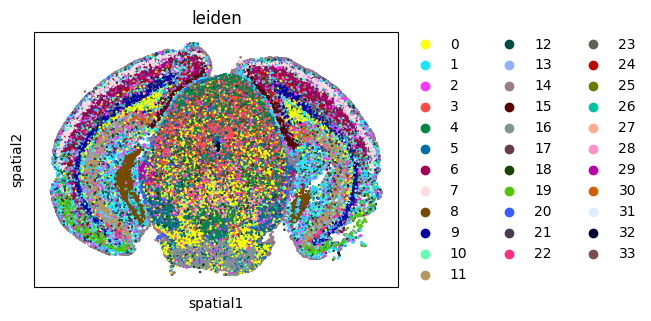

In [15]:
sq.gr.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
)
sq.pl.co_occurrence(
    adata_subsample,
    cluster_key="leiden",
    clusters="12",
    figsize=(10, 10),
)
sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    shape=None,
    size=2,
)

In [16]:
sq.gr.nhood_enrichment(adata, cluster_key="leiden")

100%|█████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.24/s]


/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


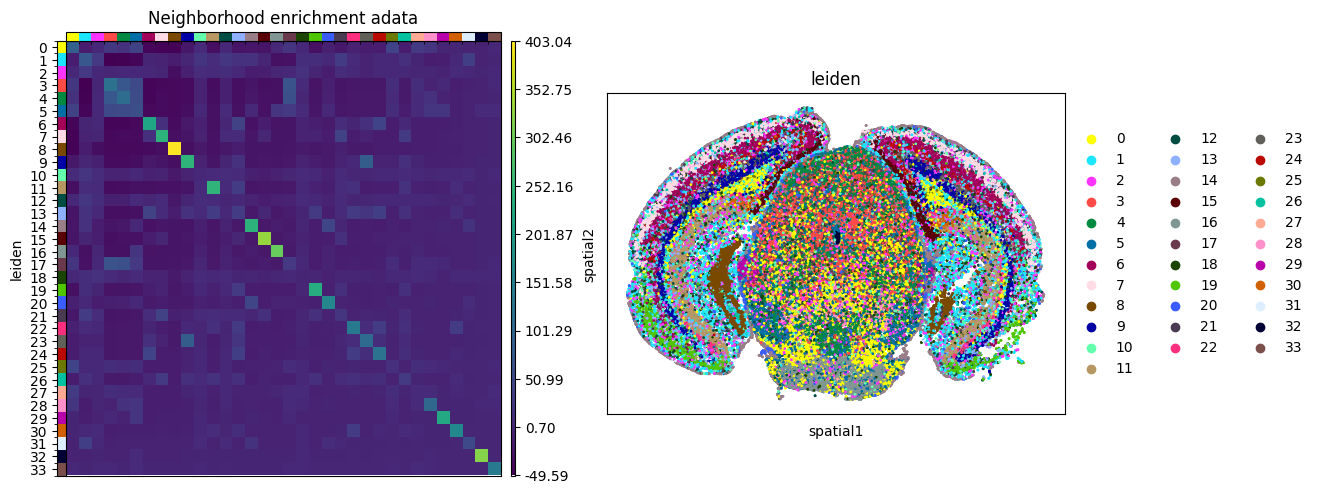

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))
sq.pl.nhood_enrichment(
    adata,
    cluster_key="leiden",
    figsize=(16, 16),
    title="Neighborhood enrichment adata",
    ax=ax[0],
)
sq.pl.spatial_scatter(adata_subsample, color="leiden", shape=None, size=4, ax=ax[1])

/Users/rmahla_admin/.pyenv/versions/3.9.2/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


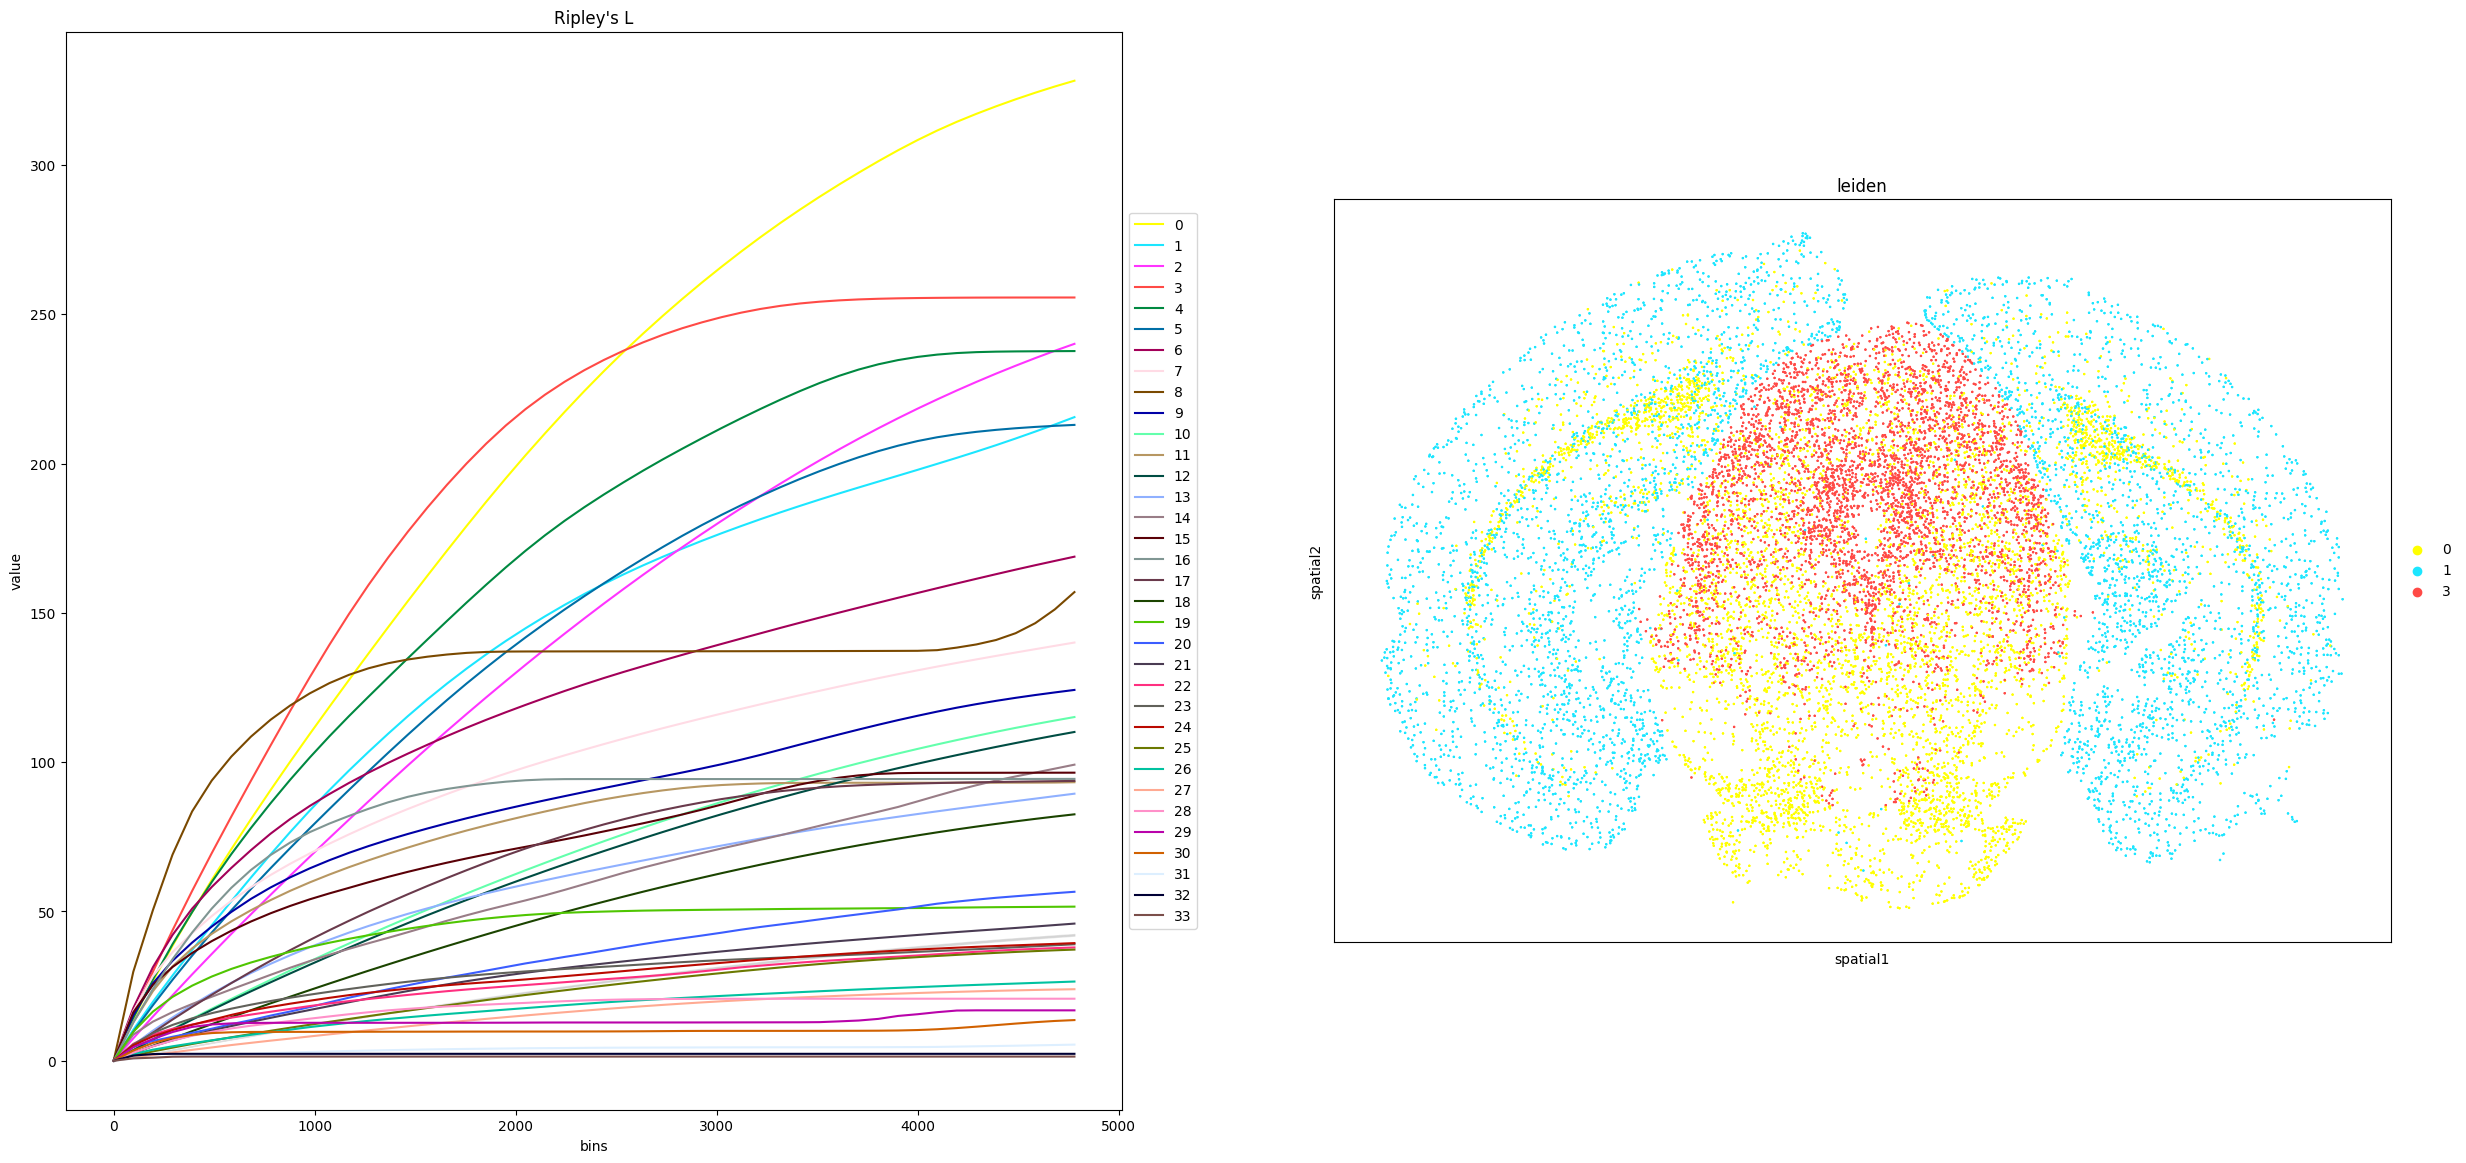

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(30, 14))
mode = "L"

sq.gr.ripley(adata, cluster_key="leiden", mode=mode)
sq.pl.ripley(adata, cluster_key="leiden", mode=mode, ax=ax[0])

sq.pl.spatial_scatter(
    adata_subsample,
    color="leiden",
    groups=["0", "1", "3"],
    shape=None,
    size=2,
    ax=ax[1],
)

In [19]:
sq.gr.spatial_neighbors(adata_subsample, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(
    adata_subsample,
    mode="moran",
    n_perms=200,
    n_jobs=2,
)
adata_subsample.uns["moranI"].head(10)


100%|███████████████████████████████████████████| 200/200 [14:50<00:00,  4.45s/]


I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
Slc17a7  0.707052        0.0  0.000005         0.0  0.004975  0.000011   
Gfap     0.599815        0.0  0.000005         0.0  0.004975  0.000010   
Chrm1    0.582966        0.0  0.000005         0.0  0.004975  0.000007   
Baiap2   0.466328        0.0  0.000005         0.0  0.004975  0.000007   
Mas1     0.422368        0.0  0.000005         0.0  0.004975  0.000007   
Grin2b   0.422052        0.0  0.000005         0.0  0.004975  0.000007   
Sstr4    0.410966        0.0  0.000005         0.0  0.004975  0.000008   
Slc47a1  0.405451        0.0  0.000005         0.0  0.004975  0.000008   
Glp2r    0.399889        0.0  0.000005         0.0  0.004975  0.000007   
Gprc5b   0.387244        0.0  0.000005         0.0  0.004975  0.000008   

         pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
Slc17a7               0.0                0.0         0.006053  
Gfap                  0.0                0.0         0.006053  
Chrm1                 0.0                0.0         0.006053  
Baiap2                0.0                0.0         0.006053  
Mas1                  0.0                0.0         0.006053  
Grin2b                0.0                0.0         0.006053  
Sstr4                 0.0                0.0         0.006053  
Slc47a1               0.0                0.0         0.006053  
Glp2r                 0.0                0.0         0.006053  
Gprc5b                0.0                0.0         0.006053

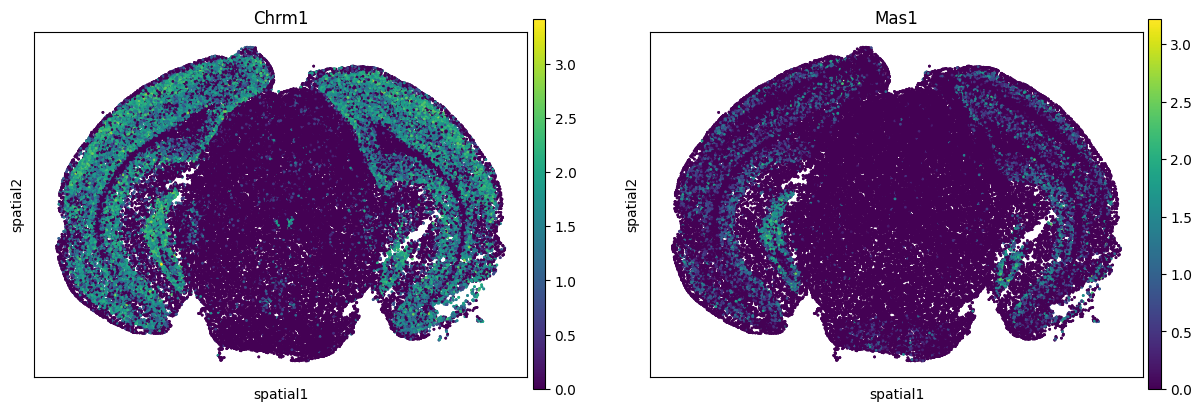

In [20]:
sq.pl.spatial_scatter(
    adata_subsample,
    color=[
        "Chrm1",
        "Mas1",
    ],
    shape=None,
    size=4,
    img=False,
)

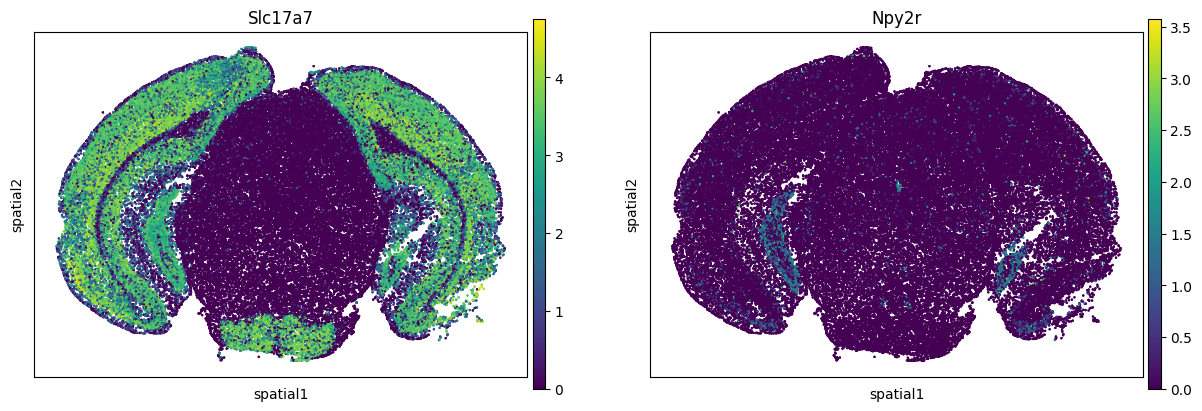

In [21]:
sq.pl.spatial_scatter(
    adata_subsample,
    color=[
        "Slc17a7",
        "Npy2r",
    ],
    shape=None,
    size=2,
    img=False,
)